# Lab IV: Linear Models
## Mason Nicoletti

### Q0.

1. A linear model is "linear" in the sense that we can estimate a regression line from existing data observations. Linear models use a straight line to predict a relationships between variables.

2. One-hot encoding breaks up a categorical variable into multiple separate features. This means the descendent dummy variables from one-hot encoding introduce **multicollinear**, where the resulting columns are redundant and can be predicted from each other. As a result, this may produce singularity and act as a detriment to the model. In order to interpret the coefficient for a dummy variable, it is best practice to omit a column from each category after one-hot encoding a categorical variable. Doing so will remove redundancy and ensure that the remaining dummy variables are independent. Now, the coefficient is the frequency of the observation for a categorical variable relative to the dropped category.

3. Even though linear regression is continuous and classification is discrete, it is possible to use linear regression for classification by revealing distinct relationships between multiple variables that can be used to group observations into different clusters.

4. If the model is highly accurate on the training data but not very accurate on the testing data, this is a sign of **overfitting**. If the model is so highly attuned to fit the training data that it does not generalize well to the test data, it will also not generalize well to additional data.

5. One option to incorporate a nonlinear relationship between target variables and features is to create a new feature from an existing x variable that simply raises that variable to a different power. This is an example of manually creating a polynomial feature. `sklearn.preprocessing.PolynomialFeatures` can also be used to create polynomial features. Another option is to use a 'kernel' that will assign a weight to each sample. This process can be done with support vector machine used on a polynomial kernel. A support vector machine can be imported from `sklearn.svm` and done with the `SVR`, setting `kernel='poly'`.

6. The intercept represents the value of the target variable when the independent variable equals zero. The slope coefficient for a variable is the rate at which the target variable increases given an increase in the independent variable. Both of these factors are important for determining the relationships between features and the target in linear regression. The coefficient for a dummy variable can be interpreted as the amount the target variable would vary for the feature compared to the categorical variable that was omitted during the one-hot encoding process for a linear model.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


### Q1. NYC Property Data

In [2]:
# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")

#nyc_prop.info()

                    Price  Review Scores Rating
Neighbourhood                                  
Manhattan      183.664286             91.801496
Staten Island  146.166667             90.843750
Brooklyn       127.747378             92.363497
Queens          96.857233             91.549057
Bronx           75.276498             91.654378


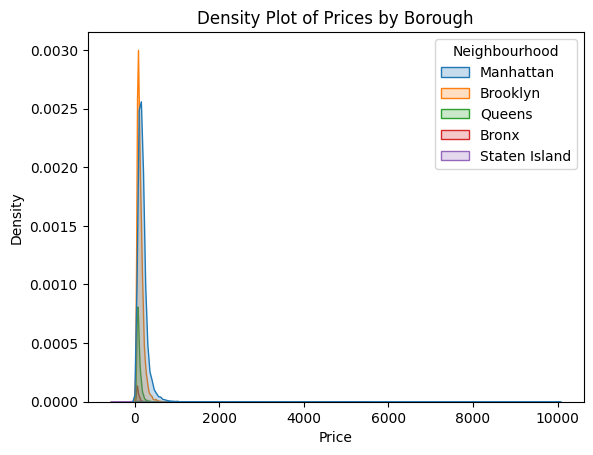

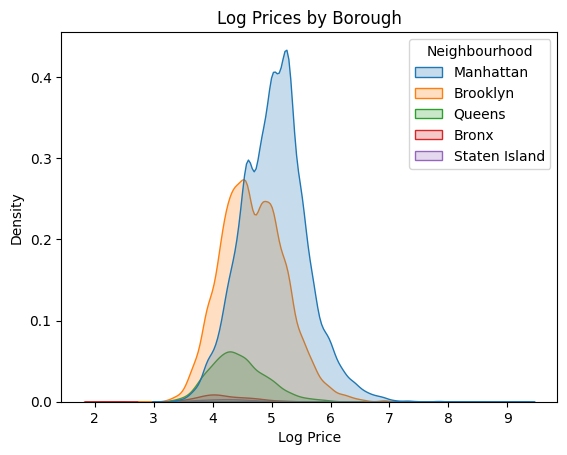

In [3]:
# Q1.1

'''
Compute the average prices and scores by Neighborhood; which borough is the most expensive on average? 
Create a kernel density plot of price and log price, grouping by Neighborhood.
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")

# Group by neighborhood
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace= True)
neighborhoods = nyc_prop.groupby("Neighbourhood")

# Compute the average prices and scores by neighborhood
ave_price_score_by_borough = neighborhoods[["Price", "Review Scores Rating"]].mean().sort_values(by='Price', ascending=False)
print(ave_price_score_by_borough)

# Create kde plot of price grouped by neighborhood
sns.kdeplot(data = nyc_prop, x="Price", hue="Neighbourhood", fill=True)
plt.title("Density Plot of Prices by Borough")
plt.show()

# Add a column to the dataframe for Log Price
nyc_prop["Log Price"] = np.log(nyc_prop['Price'])

# Create a kde plot of log price group by neighborhood
sns.kdeplot(data = nyc_prop, x="Log Price", hue="Neighbourhood", fill=True)
plt.title("Log Prices by Borough")
plt.show()


Q1.1

On average, Manhattan is the borough with the most expensive properties.

In [4]:
# Q1.2

'''
Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. 
Compare the coefficients in the regression to the table from part 1. 
What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace= True)

# One-hot Encoding fot Neighborhoods
nyc_prop = pd.get_dummies(nyc_prop, columns = ['Neighbourhood'])

# Define features
features = nyc_prop.iloc[:, -5:]
target = nyc_prop['Price']

# Regress Price on Neighbourhood and get the coefficients
model = LinearRegression(fit_intercept=False)
model.fit(features, target)
coef = model.coef_

# Arrange coefficients in a table
coefficients = pd.DataFrame({'Coefficient': coef}, index = features.columns).sort_values(by="Coefficient", ascending=False)


print("Coefficient Table:\n", coefficients)
print('\nComparison Table from Part 1:\n', ave_price_score_by_borough['Price'])


Coefficient Table:
                              Coefficient
Neighbourhood_Manhattan       183.664286
Neighbourhood_Staten Island   146.166667
Neighbourhood_Brooklyn        127.747378
Neighbourhood_Queens           96.857233
Neighbourhood_Bronx            75.276498

Comparison Table from Part 1:
 Neighbourhood
Manhattan        183.664286
Staten Island    146.166667
Brooklyn         127.747378
Queens            96.857233
Bronx             75.276498
Name: Price, dtype: float64


Q1.2

These coefficients are the same as the average prices for each borough found in Q1.1. This means that the coefficients are just the average value of the target variable for each category.

In [5]:
# Q1.3

'''
Repeat part 2, but leave an intercept in the linear model. 
How do you have to handle the creation of the dummies differently? 
What is the intercept? Interpret the coefficients. 
How can I get the coefficients in part 2 from these new coefficients?
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# One-hot Encoding fot Neighborhoods
nyc_prop = pd.get_dummies(nyc_prop, columns = ['Neighbourhood'], drop_first=True)

# Define features
features = nyc_prop.iloc[:, -4:]
target = nyc_prop['Price']

# Regress Price on Neighbourhood and get the coefficients
model = LinearRegression(fit_intercept=True)
model.fit(features, target)
coef = model.coef_
intercept = model.intercept_

# Arrange coefficients in a table
coefficients = pd.DataFrame({'Coefficient': coef}, index = features.columns).sort_values(by="Coefficient", ascending=False)

print("Intercept:\n", intercept, "\n")
print("Coefficient Table:\n", coefficients)


Intercept:
 75.2764976958471 

Coefficient Table:
                              Coefficient
Neighbourhood_Manhattan       108.387789
Neighbourhood_Staten Island    70.890169
Neighbourhood_Brooklyn         52.470881
Neighbourhood_Queens           21.580735


Q1.3

In this question, you have to drop one of the categories when creating dummy variables, indicated by `drop_first = True`. This needs to be done in order to fit the model with an intercept because the intercept serves as a comparison to the category that was dropped. In this case, it is the mean price for the Bronx borough.

Now that the linear model is fitted with an intercept, the coefficients for the other four boroughs are different than just the mean value. This is because this updated model incorporates a y-intercept - a predicted y value for when x = 0 - causing the slope to vary. This creates a better fitting regression line for the data. The coefficients for the NYC Boroughs are now smaller because, thanks to the y-intercept, the slope of the line can be flatter to best fit the data points and minimize error. The coefficients in part 2 can be obtained from the coefficients found in this question by adding the y-intercept to the coefficient for each borough individually.

In [6]:
# Q1.4

'''
Split the sample 80/20 into a training and a test set. 
Run a regression of Price on Review Scores Rating and Neighborhood. 
What is the R2 and RMSE on the test set? 
What is the coefficient on Review Scores Rating? 
What is the most expensive kind of property you can rent?
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# Set up features and target variable
nyc_prop = pd.get_dummies(nyc_prop, columns = ['Neighbourhood'], drop_first=True)
x = nyc_prop[['Review Scores Rating', 'Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan', 'Neighbourhood_Queens', 'Neighbourhood_Staten Island']]
y = nyc_prop["Price"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

# Standardize Data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Run a regression of Price on Review Scores Rating and Neighborhood. 
model = LinearRegression()
model.fit(x_train, y_train)

# Determine coefficients and intercept
coef = model.coef_.round(3)
intercept = model.intercept_.round(3)

# Calculate R2 and RMSE on the test set
pred = model.predict(x_test)
R2 = r2_score(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = MSE ** 0.5

# Assemble table of coefficients
coefficient_table = pd.DataFrame({'Intercept': intercept, 'Coefficient': coef}, index = x.columns)

# Output
print("R2:", R2)
print("RMSE:", RMSE)

print("Coefficient of Review Scores Rating:", coefficient_table.loc['Review Scores Rating', 'Coefficient'])

print(coefficient_table)

R2: 0.06991752100977788
RMSE: 118.96716480770047
Coefficient of Review Scores Rating: 81.867
                             Intercept  Coefficient
Review Scores Rating             0.936       81.867
Neighbourhood_Brooklyn           0.936       53.030
Neighbourhood_Manhattan          0.936      109.915
Neighbourhood_Queens             0.936       22.366
Neighbourhood_Staten Island      0.936       74.867


Q1.4

The most expensive kinds of properties to rent are in Manhattan. The coefficient for Manhattan is the greatest.

In [7]:
# Q1.5

'''
Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. 
What is the R2 and RMSE on the test set? What is the coefficient on Review Scores Rating? 
What is the most expensive kind of property you can rent?
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# One-hot Encoding for Property Type
prop_type = ["Apartment", "House"]
nyc_prop["Property Type"] = (nyc_prop['Property Type'].apply(lambda x: x if x in prop_type else 'Other')).astype('category')
nyc_prop = pd.get_dummies(nyc_prop, columns = ["Neighbourhood", "Property Type"], drop_first=True)

# Set up features and target variable
x = pd.concat([nyc_prop[['Review Scores Rating']], nyc_prop.iloc[:, -6:]], axis=1)
y = nyc_prop['Price']

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

# Standardize Data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Regression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
coefs = model.coef_.round(3)
intercept = model.intercept_.round(3)

# Calculate error
R2 = r2_score(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = MSE ** 0.5

# Create a coefficient table
coef_table = pd.DataFrame({"Intercept": intercept, "Coefficients": coefs}, index = x.columns)

# Output
print("R2:", R2)
print("RMSE:", RMSE)
print("Coefficient of Review Scores Rating:", coefficient_table.loc['Review Scores Rating', 'Coefficient'])

coef_table

R2: 0.047899812540371234
RMSE: 132.33490767464986
Coefficient of Review Scores Rating: 81.867


,Intercept,Coefficients
Review Scores Rating,-28.627,99.125
Neighbourhood_Brooklyn,-28.627,60.344
Neighbourhood_Manhattan,-28.627,122.756
Neighbourhood_Queens,-28.627,25.349
Neighbourhood_Staten Island,-28.627,11.620
Property Type_House,-28.627,36.688
Property Type_Other,-28.627,47.936


Q1.5

The most expensive properties to rent are in Manhattan, and the most expensive property types fall into the category of properties other than apartments or houses. This other category includes properties such as condominiums, villas, townhouses, bed & breakfast, and more.

Q1.6

*What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5?*

If the coefficient on `Review Scores Rating` changes, that means it is contributing a different weight to the model. For instance, if the coefficient is smaller in part 5 compared to part 4, that means that `Review Scores Rating` contributes less to the regression model due to the addition of the `Property Type` variable, which has an influence on the prediction of `Price`.

In [8]:
# Q1.7

'''
We've included Neighborhood and Property Type separately in the model. 
How do you interact them, so you can have “A bedroom in Queens” or “A townhouse in Manhattan”. 
Split the sample 80/20 into a training and a test set and run a regression including that kind of “property type X neighborhood” dummy, plus Review Scores Rating. 
How does the slope coefficient for Review Scores Rating, the R2 , and the RMSE change? 
Do they increase significantly compares to part 5? 
Are the coefficients in this regression just the sum of the coefficients for Neighbourhood and Property Type from 5? 
What is the most expensive kind of property you can rent?
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# Create interaction terms for Neighborhood and Property Type
prop_type = ["Apartment", "House"]
nyc_prop["Property Type"] = (nyc_prop['Property Type'].apply(lambda x: x if x in prop_type else 'Other'))
nyc_prop['Neighborhood_PropertyType'] = nyc_prop['Neighbourhood'] + " " + nyc_prop['Property Type']

# Create dummy variables for the interaction terms
dummies = pd.get_dummies(nyc_prop['Neighborhood_PropertyType'], drop_first=True)

# Combine the dummy variables with the original DataFrame
nyc_prop = pd.concat([nyc_prop, dummies], axis=1)

# Define the target variable and the features
x = nyc_prop[['Review Scores Rating']].join(dummies)
y = nyc_prop['Price']

# Split the data into training and test sets (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize Data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Perform linear regression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Calculate R2 and RMSE on the test set
R2 = r2_score(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = MSE ** 0.5

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame to display the intercept and coefficients
coef_table = pd.DataFrame({'Intercept': intercept, 'Coefficient': coefficients}, index=x.columns)

print("R2:", R2)
print("RMSE:", RMSE)
print("Coefficient of Review Scores Rating:", coef_table.loc['Review Scores Rating', 'Coefficient'])
print("Coefficients:")
print(coef_table)


R2: 0.05913558052512091
RMSE: 139.9392644715772
Coefficient of Review Scores Rating: 98.13796166410512
Coefficients:
                         Intercept  Coefficient
Review Scores Rating    -12.037823    98.137962
Bronx House             -12.037823    -4.226168
Bronx Other             -12.037823    41.207007
Brooklyn Apartment      -12.037823    47.100104
Brooklyn House          -12.037823    79.926802
Brooklyn Other          -12.037823    62.988466
Manhattan Apartment     -12.037823   103.169693
Manhattan House         -12.037823   237.234691
Manhattan Other         -12.037823   216.280119
Queens Apartment        -12.037823    20.734499
Queens House            -12.037823    19.924438
Queens Other            -12.037823    13.973301
Staten Island Apartment -12.037823    23.990765
Staten Island House     -12.037823    23.864347
Staten Island Other     -12.037823    -7.059618


Q1.7

The coefficients for Neighborhood and Property Type combines became more specific than just those variables separately. The R2 and RMSE did not significantly change from part 4 and part 5. The most expensive properties are Houses in Manhattan. Other types of properties in Manhattan are the second most expensive. Manhattan in general is just the most expensive place to own a property - apartments are also very expensive in this borough, significantly more so than the other boroughs.

### Q2. Car Prices

In [9]:
# Load data
car_data = pd.read_csv('../data/cars_hw.csv')

car_data.info()
#car_data.describe()
#car_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


In [17]:
# Q2.1
# Clean the data

# Load data
car_data = pd.read_csv('../data/cars_hw.csv')

# Drop unnecesary column
car_data_cleaned = car_data.drop(["Unnamed: 0"], axis=1)

# Convert some integer features to categorical variables
#car_data_cleaned.Make_Year = car_data_cleaned.Make_Year.astype('category')
#car_data_cleaned.Seating_Capacity = car_data_cleaned.Seating_Capacity.astype('category')

# Remove outlier in Price
#car_data.boxplot(column = "Price")
car_data_cleaned = car_data_cleaned[(car_data_cleaned['Price'] <= 2800000)]


# Convert object features to categorical variables
#categorical_var = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
#car_data.loc[:,categorical_var] = car_data.loc[:,categorical_var].astype('category')

#car_data.boxplot(column = "Mileage_Run")

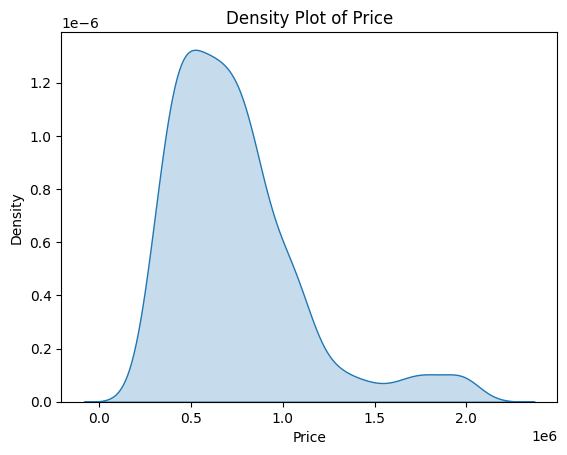

Car Prices summarized by Make:                count        mean        std        min        25%        50%  \
Make                                                                           
MG Motors       35.0  1869457.14  121661.14  1589000.0  1786500.0  1848000.0   
Kia              8.0  1614750.00  119056.71  1369000.0  1579000.0  1628500.0   
Jeep             4.0  1499500.00  152513.39  1290000.0  1447500.0  1529500.0   
Mahindra        18.0  1100166.67  175549.31   796000.0  1037000.0  1094500.0   
Tata            23.0  1055217.39  557830.53   188000.0   779500.0   869000.0   
Nissan           4.0   884250.00  289559.87   475000.0   782500.0   978000.0   
Toyota          50.0   800340.00  246689.97   368000.0   526250.0   894000.0   
Honda           73.0   798972.60  266509.07   316000.0   581000.0   785000.0   
Ford            52.0   721173.08  140927.70   290000.0   635000.0   707500.0   
Hyundai        305.0   691891.80  279159.71   248000.0   485000.0   638000.0   
Skoda    

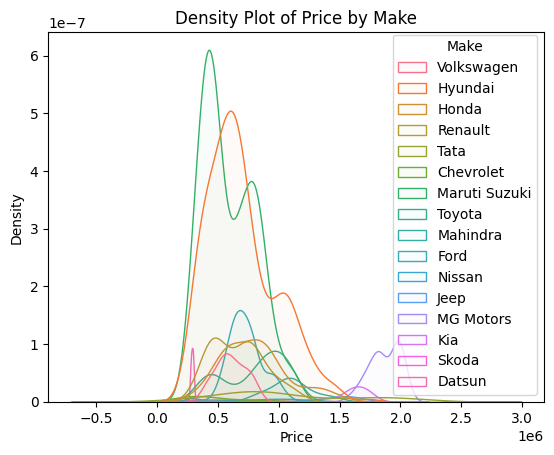

In [21]:
# Q2.2

'''
Summarize the Price variable and create a kernel density plot. 
Use .groupby() and .describe() to summarize prices by brand (Make). 
Make a grouped kernel density plot by Make. 
Which car brands are the most expensive? 
What do prices look like in general?
'''
car_data = car_data_cleaned

# Price kdeplot
sns.kdeplot(data=car_data_cleaned, x = "Price", fill=True)
plt.title("Density Plot of Price")
plt.show()

# Summarize prices by make
car_data3 = car_data_cleaned.groupby("Make")['Price'].describe().sort_values(by='mean', ascending=False)
print("Car Prices summarized by Make:", car_data3.round(2))

# Price kdeplot by Make
sns.kdeplot(data=car_data_cleaned, x='Price', hue='Make', fill=True, alpha=0.03)
plt.title("Density Plot of Price by Make")
plt.show()

Q2.2

From just looking at the KDE Plot, one can see that brands such as MG Motors, Tata, and Kia have some of the highest priced cars. These individual kde lines tend to have the same distribution - two mounds where the density peaks - the former mound being larger than the second one.

In [22]:
# Q2.3

'''
Split the data into an 80% training set and a 20% testing set.
'''

# Split the data
car_data_train, car_data_test = train_test_split(car_data_cleaned, train_size = 0.8)

In [23]:
# Q2.4

'''
Make a model where you regress price on the numeric variables alone; 
what is the R2 and RMSE on the training set and test set? 
Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); 
be careful of the dummy variable trap); 
what is the R2 and RMSE on the test set? 
Which model performs better on the test set? 
Make a third model that combines all the regressors from the previous two; 
what is the R2 and RMSE on the test set? 
Does the joint model perform better or worse, and by home much?
'''

# Model 1: Numeric Data
car_data = car_data_cleaned

x = car_data.select_dtypes('number').drop(columns="Price")
y = car_data["Price"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

# Standardize Data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train).round(3)
x_test = scaler.transform(x_test).round(3)

# Make regression model
model = LinearRegression()
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
coef = model.coef_.round(3)
intercept = model.intercept_.round(3)

# Calculate training error
R2_train = r2_score(y_train, pred_train)
MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = MSE_train ** 0.5

# Calculate test error
R2_test = r2_score(y_test, pred_test)
MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = MSE_test ** 0.5

# Output
print("Model 1:")
print("R2 of the training set:", R2_train)
print("RMSE of the training set:", RMSE_train)
print("R2 of the test set:", R2_test)
print("RMSE of the test set:", RMSE_test)
print('\n')


# Model 2: Categorical Data

x2 = car_data.select_dtypes(include=['object', 'category'])
y2 = car_data['Price']

object_list = list(car_data.select_dtypes('object'))
category_list = list(car_data.select_dtypes('category'))

x2 = pd.get_dummies(x2, columns = object_list + category_list, drop_first=True)

# Split the data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8)

# Standardize Data
scaler2 = MinMaxScaler()
x2_train = scaler2.fit_transform(x2_train).round(3)
x2_test = scaler2.transform(x2_test).round(3)

# Make regression model
model2 = LinearRegression()
model2.fit(x2_train, y2_train)
pred2_train = model2.predict(x2_train)
pred2_test = model2.predict(x2_test)
coef2 = model2.coef_.round(3)
intercept2 = model2.intercept_.round(3)

# Calculate training error
R22_train = r2_score(y2_train, pred2_train)
MSE2_train = mean_squared_error(y2_train, pred2_train)
RMSE2_train = MSE2_train ** 0.5

# Calculate test error
R22_test = r2_score(y2_test, pred2_test)
MSE2_test = mean_squared_error(y2_test, pred2_test)
RMSE2_test = MSE2_test ** 0.5

# Output
print("Model 2:")
#print("R2 of the training set:", R22_train)
#print("RMSE of the training set:", RMSE2_train)
print("R2 of the test set:", R22_test)
print("RMSE of the test set:", RMSE2_test)
print('\n')


# Model 3: Numeric and Categorical Data

x3 = car_data.drop(columns="Price")
y3 = car_data['Price']

x3 = pd.get_dummies(x3, columns = object_list + category_list, drop_first=True)

# Split the data
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size=0.8)

# Standardize Data
scaler3 = MinMaxScaler()
x3_train = scaler3.fit_transform(x3_train).round(3)
x3_test = scaler3.transform(x3_test).round(3)

# Make regression model
model3 = LinearRegression()
model3.fit(x3_train, y3_train)
pred3_train = model3.predict(x3_train)
pred3_test = model3.predict(x3_test)
coef3 = model3.coef_.round(3)
intercept3 = model3.intercept_.round(3)

# Calculate training error
R23_train = r2_score(y3_train, pred3_train)
MSE3_train = mean_squared_error(y3_train, pred3_train)
RMSE3_train = MSE3_train ** 0.5

# Calculate test error
R23_test = r2_score(y3_test, pred3_test)
MSE3_test = mean_squared_error(y3_test, pred3_test)
RMSE3_test = MSE3_test ** 0.5

# Output
print("Model 3:")
#print("R2 of the training set:", R23_train)
#print("RMSE of the training set:", RMSE3_train)
print("R2 of the test set:", R23_test)
print("RMSE of the test set:", RMSE3_test)
print('\n')

Model 1:
R2 of the training set: 0.30207149348056117
RMSE of the training set: 302167.4157901241
R2 of the test set: 0.3990200579559805
RMSE of the test set: 275125.2878584762


Model 2:
R2 of the test set: 0.7290703636795897
RMSE of the test set: 175728.19566279385


Model 3:
R2 of the test set: 0.8228733963630872
RMSE of the test set: 141023.41001881342




Q2.4

Comparing just the first and second models, the second model with the categorical features performed better than the model with numeric variables.

After adding in the third model, this joint model performed better than the other two models of just categorical and numeric data by themselves.

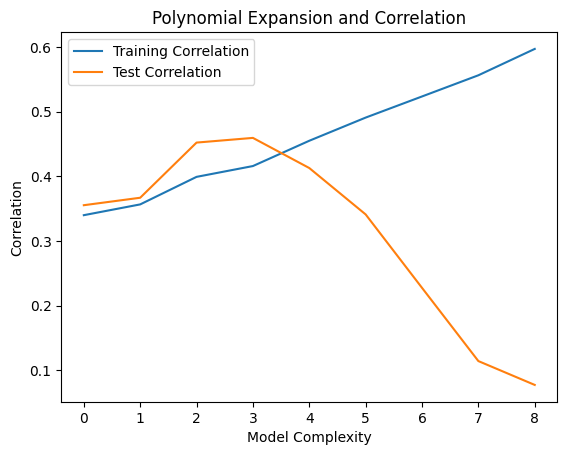

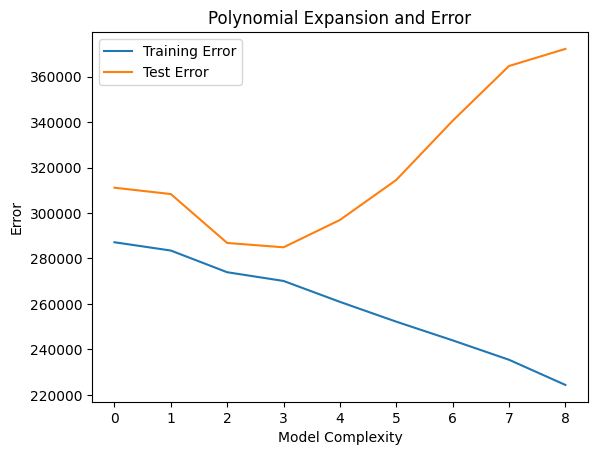

The model with the best performance is the one expanded to 5 degrees.
It has R2 score: 0.4593262081348435
It has RMSE score: 284919.65132257144


In [29]:
# Q2.5

'''
Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. 
As you increase the degree of the expansion, how do the R2 and RMSE change? 
At what point does R2 go negative on the test set? 
For your best model with expanded features, what is the R2 and RMSE? 
How does it compare to your best model from part 4?
'''

car_data = car_data_cleaned

R2_train_list = []
RMSE_train_list = []
R2_test_list = []
RMSE_test_list = []

degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for d in degrees:
    # Prepare Data
    x = car_data.select_dtypes('number').drop(columns="Price")
    y = car_data['Price']

    # Expand numerical variables
    poly2 =  PolynomialFeatures(degree=d)
    x_poly = poly2.fit_transform(x)

    feature_names = poly2.get_feature_names_out(input_features=x.columns)
    x = pd.DataFrame(x_poly, columns=feature_names)

    # Split Data
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 45)

    # Standardize Data
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train).round(3)
    x_test = scaler.transform(x_test).round(3)

    # Make Regression Model
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    coef = model.coef_.round(3)
    intercept = model.intercept_.round(3)

    # Calculate training error
    R2_train = r2_score(y_train, pred_train)
    MSE_train = mean_squared_error(y_train, pred_train)
    RMSE_train = MSE_train ** 0.5

    # Calculate test error
    R2_test = r2_score(y_test, pred_test)
    MSE_test = mean_squared_error(y_test, pred_test)
    RMSE_test = MSE_test ** 0.5

    # Append Error to lists
    R2_train_list.append(R2_train)
    RMSE_train_list.append(RMSE_train)
    R2_test_list.append(R2_test)
    RMSE_test_list.append(RMSE_test)


# Plot Errors
plt.plot(R2_train_list, label = "Training Correlation")
plt.plot(R2_test_list, label = "Test Correlation")
plt.title("Polynomial Expansion and Correlation")
plt.xlabel('Model Complexity')
plt.ylabel('Correlation')
plt.legend()
plt.show()

plt.plot(RMSE_train_list, label = "Training Error")
plt.plot(RMSE_test_list, label = "Test Error")
plt.title("Polynomial Expansion and Error")
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

# Output
max_correlation = max(R2_test_list)
max_index = R2_test_list.index(max_correlation) + 2
min_error = min(RMSE_test_list)
min_index = RMSE_test_list.index(min_error) + 2
print(f"The model with the best performance is the one expanded to {max_index} degrees.")
print(f"It has R2 score:", max_correlation)
print(f"It has RMSE score:", min_error)

Q2.5

Out of all of the polynomial models, the best performing model is expanded to 5 degrees. This model is still not as well-fit as the model made from categorical data and the combined numerical and categorical data models from part 4.

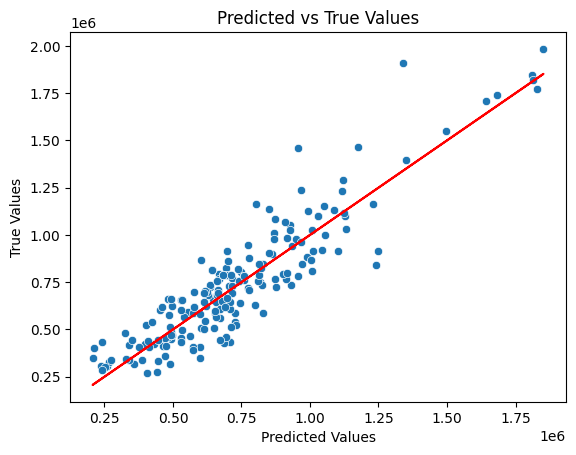

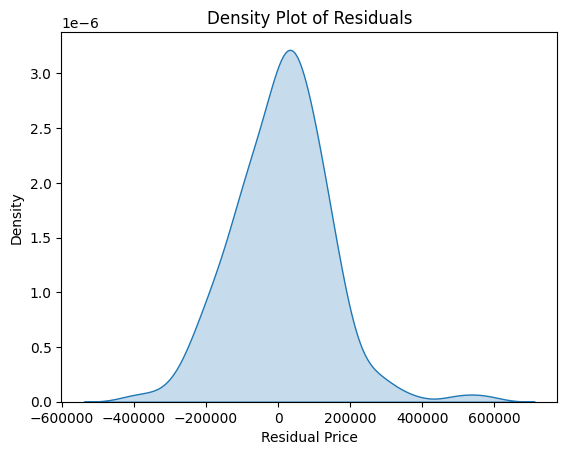

In [34]:
# Q2.6

'''
For your best model so far, determine the predicted values for the test data and plot them against the true values. 
Do the predicted values and true values roughly line up along the diagonal, or not? 
Compute the residuals/errors for the test data and create a kernel density plot. 
Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
'''

# Model 3: Numeric and Categorical Data

car_data = car_data_cleaned

x = car_data.drop(columns="Price")
y = car_data['Price']

x = pd.get_dummies(x, columns = object_list + category_list, drop_first=True)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

# Standardize Data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train).round(3)
x_test = scaler.transform(x_test).round(3)

# Make regression model
model = LinearRegression()
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
coef = model.coef_.round(3)
intercept = model.intercept_.round(3)

# Calculate training error
R2_train = r2_score(y_train, pred_train)
MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = MSE_train ** 0.5

# Calculate test error
R2_test = r2_score(y_test, pred_test)
MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = MSE_test ** 0.5

# Plot the Predicted Test Values against the True Values
sns.scatterplot(x = pred_test, y = y_test)
plt.plot(pred_test, pred_test, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Predicted vs True Values')
plt.show()

# Compute the residuals for test data
residuals = y_test - pred_test

# Plot the density of residuals
sns.kdeplot(data=residuals, fill=True)
plt.xlabel("Residual Price")
plt.title("Density Plot of Residuals")
plt.show()

Q2.6

In the plot of the predicted values against the true values, the data points line up against the diagonal quite well.

The density plot of the residuals has a roughly normal distribution, centered around 0. This means that the complexity of this model is appropriate with regards to predicting price given the data features. There are still some weaknesses to this model, as the presence of outliers can skew the interpretation and negatively impact the model's performance.

### Q3. Lung Cancer Prediction Data

In [19]:
# Q3.1

# Find Dataset
cancer_data = pd.read_csv('lung_cancer_prediction.csv')
cancer_data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [20]:
# Q3.2

'''
Clean the data and do some exploratory data analysis on key variables that interest you. 
Pick a particular target/outcome variable and features/predictors.
'''
# Find Dataset
cancer_data = pd.read_csv('lung_cancer_prediction.csv')

# Convert object feature to category type
cancer_data['Level'] = cancer_data.Level.astype('category')

# Drop unnecessary columns
cancer_data = cancer_data.drop(columns = ['index', 'Patient Id'], axis=1)

# Select target variable
y = cancer_data['chronic Lung Disease']

# Select features
feature_columns = ['Age', 'Smoking', 'Chest Pain', 'Shortness of Breath', 'Obesity', 'Air Pollution']
x = cancer_data[feature_columns]


In [21]:
# Q3.3

# Split the sample into an ~80% training set and a ~20% test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)


In [ ]:
# Q3.4

'''
Run a few regressions of your target/outcome variable on a variety of features/predictors. 
Compute the RMSE on the test set.
'''
# Model 1: All features

# Standardize Data
scaler = MinMaxScaler()
x1_train = scaler.fit_transform(x_train)
x1_test = scaler.fit_transform(x_test)

# Regression
model = LinearRegression()
model.fit(x1_train, y_train)
pred = model.predict(x_test)
coef = model.coef_
intercept = model.intercept_

# Make coefficient table
coef_table = pd.DataFrame({'Intercept': intercept, 'Coefficient': coef}, index=feature_columns)

# Calculate error
R2 = r2_score(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = MSE ** 0.5

# Output
print('Model 1: All selected features')
print("RMSE:", RMSE)
print(coef_table)
print('\n')


# Model 2: Polynomial Expansion to the Second Degree

# Expand numerical variables
poly =  PolynomialFeatures(degree=2)
x2_train = poly.fit_transform(x_train)
x2_test = poly.fit_transform(x_test)

feature_names = poly.get_feature_names_out(input_features=x.columns)
x2_train = pd.DataFrame(x2_train, columns=feature_names)
x2_test = pd.DataFrame(x2_test, columns=feature_names)

# Standardize Data
scaler2 = MinMaxScaler()
x2_train = scaler2.fit_transform(x2_train)
x2_test = scaler2.fit_transform(x2_test)

# Regression
model2 = LinearRegression()
model2.fit(x2_train, y_train)
pred2 = model2.predict(x2_test)
coef2 = model2.coef_
intercept2 = model2.intercept_

# Make coefficient table
coef_table2 = pd.DataFrame({'Intercept': intercept2, 'Coefficient': coef2}, index=feature_names)

# Calculate error
R22 = r2_score(y_test, pred2)
MSE2 = mean_squared_error(y_test, pred2)
RMSE2 = MSE2 ** 0.5

# Output
print('Model 2: Polynomial Expansion (2 Degrees)')
print("RMSE:", RMSE2)
print(coef_table2)
print('\n')


# Model 3: Most Significant Features

# Narrow Down Columns
x_train_df = pd.DataFrame(x_train, columns = feature_columns)
x_test_df = pd.DataFrame(x_test, columns = feature_columns)

reduced_features = ['Chest Pain', 'Air Pollution']
x_train_df = x_train_df[reduced_features]
x_test_df = x_test_df[reduced_features]

x3_train = x_train_df.to_numpy()
x3_test = x_test_df.to_numpy()

# Standardize Data
scaler3 = MinMaxScaler()
x3_train = scaler.fit_transform(x3_train)
x3_test = scaler.fit_transform(x3_test)

# Regression
model3 = LinearRegression()
model3.fit(x3_train, y_train)
pred3 = model3.predict(x3_test)
coef3 = model3.coef_
intercept3 = model3.intercept_

# Make coefficient table
coef_table3 = pd.DataFrame({'Intercept': intercept3, 'Coefficient': coef3}, index=reduced_features)

# Calculate error
R23 = r2_score(y_test, pred)
MSE3 = mean_squared_error(y_test, pred)
RMSE3 = MSE3 ** 0.5

# Output
print('Model 3: Reduced selected features')
print("RMSE:", RMSE3)
print(coef_table3)
print('\n')


# Model 4: Polynomial Expansion to the Third Degree

# Expand numerical variables
poly3 = PolynomialFeatures(degree=3)
x4_train = poly3.fit_transform(x_train)
x4_test = poly3.fit_transform(x_test)

feature_names = poly3.get_feature_names_out(input_features=x.columns)
x4_train = pd.DataFrame(x4_train, columns=feature_names)
x4_test = pd.DataFrame(x4_test, columns=feature_names)

# Standardize Data
scaler4 = MinMaxScaler()
x4_train = scaler4.fit_transform(x4_train)
x4_test = scaler4.fit_transform(x4_test)

# Regression
model4 = LinearRegression()
model4.fit(x4_train, y_train)
pred4 = model4.predict(x4_test)
coef4 = model4.coef_
intercept4 = model4.intercept_

# Make coefficient table
coef_table4 = pd.DataFrame({'Intercept': intercept4, 'Coefficient': coef4}, index=feature_names)

# Calculate error
R24 = r2_score(y_test, pred4)
MSE4 = mean_squared_error(y_test, pred4)
RMSE4 = MSE4 ** 0.5

# Output
print('Model 4: Polynomial Expansion (6 Degrees)')
print("RMSE:", RMSE4)
print('\n')

Model 1: All selected features
RMSE: 1.1067279434963575
                     Intercept  Coefficient
Age                   1.588218     0.966634
Smoking               1.588218     0.321985
Chest Pain            1.588218     3.642485
Shortness of Breath   1.588218    -0.217990
Obesity               1.588218     0.423854
Air Pollution         1.588218     1.376263


Model 2: Polynomial Expansion (2 Degrees)
RMSE: 0.7934034091876166
                                   Intercept   Coefficient
1                                   3.414851  1.997556e-15
Age                                 3.414851  1.416213e+00
Smoking                             3.414851 -7.119508e-01
Chest Pain                          3.414851 -1.553364e+00
Shortness of Breath                 3.414851 -2.931003e+00
Obesity                             3.414851  1.119108e+00
Air Pollution                       3.414851 -6.230801e+00
Age^2                               3.414851 -4.457826e-01
Age Smoking                         

Q3.5

In the previous question, my fourth model performed the best - it had the lowest RMSE Score. For this model, I used the same 6 features I originally selected in part 2, but I used polynomial expansion to the third degree. This model performed the best because there existed a more complex relationship between the features and the target variable that could best be handled by a model that employed a higher degree.

Q3.6

From my regression modeling for lung cancer prediction data, I discovered that Chest Pain is the strongest predictor of being positive for chronic lung cancer. Air pollution was the second strongest predictor (out of the 6 features I examined) in terms of predicting lung cancer. I found this surprising that air pollution is an even stronger predictor than features such as smoking status and age. 

Insights such as these can be used to improve accessibility to cancer screenings for those who live in environments with poor air quality. Individuals experiencing chest pain should be provided resources for cancer detection.